In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import sys
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [ ]:
# set attack column in each attack csv file
path = "/content/drive/MyDrive/MQTT_final/tranalyzer_csv_files/"
file_names = ["attack1_flows.csv","attack3_flows.csv","attack4_flows.csv","attack5_flows.csv","attack6_flows.csv","attack8_flows.csv"]
for file in file_names:
  df = pd.read_csv(path + file)
  print(file)
  attack = []
  for value in df['srcIP']:
    # print(value, value.split('.'))
    if value.split('.')[0] == '157':
      attack.append(1)
    else:
      attack.append(0)
  df['attack'] = attack
  # print(df.head())
  df.to_csv(path + 'modif_' + file, index = False)

attack1_flows.csv
attack3_flows.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (102,104,106) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


attack4_flows.csv
attack5_flows.csv
attack6_flows.csv
attack8_flows.csv


In [ ]:
# combine all flow files into a single dataframe
path = "/content/drive/MyDrive/MQTT_final/tranalyzer_csv_files/"
file_names = ["modif_attack1_flows.csv","modif_attack3_flows.csv","modif_attack4_flows.csv","modif_attack5_flows.csv","modif_attack6_flows.csv","modif_attack8_flows.csv"]
main_df = pd.DataFrame()
attack_type = 1
for file in file_names:
  attack = []
  curr_dataframe = pd.read_csv(path+file)
  #iterate over all rows in curr data frame and add an extra column to the data frame, whose value = attack_type if last column value is 1 else 0
  for value in curr_dataframe["attack"]:
    if value == 0:
      attack.append(0)
    elif value == 1:
      attack.append(attack_type)
  curr_dataframe["attack_type"] = attack
  attack_type = attack_type+1
  main_df = main_df.append(curr_dataframe,ignore_index = True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (102,104,106) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
main_df.shape
print(main_df.columns)

Index(['%dir', 'flowInd', 'flowStat', 'timeFirst', 'timeLast', 'duration',
       'numHdrDesc', 'numHdrs', 'hdrDesc', 'srcMac',
       ...
       'mqttClientID', 'mqttConAck', 'mqttTopic', 'connSip', 'connDip',
       'connSipDip', 'connSipDprt', 'connF', 'attack', 'attack_type'],
      dtype='object', length=114)


In [ ]:
main_df.info()
cols = main_df.columns
for col in cols:
  print(col, end = ',')
  if col == 'dstPort' or col == 'minIAT' or col == 'ip6OptHH_D' or col == 'tcpMaxWinSz' or col == 'tcpTmS' or col == 'icmpStat' or col == 'connDip':
    print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243030 entries, 0 to 243029
Columns: 114 entries, %dir to attack_type
dtypes: float64(24), int64(53), object(37)
memory usage: 211.4+ MB
%dir,flowInd,flowStat,timeFirst,timeLast,duration,numHdrDesc,numHdrs,hdrDesc,srcMac,dstMac,ethType,srcIP,srcIPCC,srcIPOrg,srcPort,dstIP,dstIPCC,dstIPOrg,dstPort,

l4Proto,macStat,macPairs,srcMac_dstMac_numP,dstPortClassN,dstPortClass,numPktsSnt,numPktsRcvd,numBytesSnt,numBytesRcvd,minPktSz,maxPktSz,avePktSize,stdPktSize,minIAT,

maxIAT,aveIAT,stdIAT,pktps,bytps,pktAsm,bytAsm,tcpFStat,ipMindIPID,ipMaxdIPID,ipMinTTL,ipMaxTTL,ipTTLChg,ipToS,ipFlags,ipOptCnt,ipOptCpCl_Num,ip6OptCntHH_D,ip6OptHH_D,

tcpISeqN,tcpPSeqCnt,tcpSeqSntBytes,tcpSeqFaultCnt,tcpPAckCnt,tcpFlwLssAckRcvdBytes,tcpAckFaultCnt,tcpBFlgtMx,tcpInitWinSz,tcpAveWinSz,tcpMinWinSz,tcpMaxWinSz,

tcpWinSzDwnCnt,tcpWinSzUpCnt,tcpWinSzChgDirCnt,tcpWinSzThRt,tcpFlags,tcpAnomaly,tcpOptPktCnt,tcpOptCnt,tcpOptions,tcpMSS,tcpWS,tcpMPTBF,tcpMPF,tcpMPAID,t

In [ ]:
print(main_df['attack'].unique())
print(main_df['attack_type'].value_counts())

[0 1]
0    133840
3    100494
4      2488
5      1963
6      1626
1      1481
2      1138
Name: attack_type, dtype: int64


In [ ]:
main_df.head()

,%dir,flowInd,flowStat,timeFirst,timeLast,duration,numHdrDesc,numHdrs,hdrDesc,srcMac,...,mqttClientID,mqttConAck,mqttTopic,connSip,connDip,connSipDip,connSipDprt,connF,attack,attack_type
0,A,4,0x0400000000004000,1.643436e+09,1.643436e+09,0.067943,1,3,eth:ipv4:tcp,42:01:0a:b6:00:01,...,NaN,0x00,NaN,1,3,4,4,4.0,0,0
1,B,4,0x0400000000004001,1.643436e+09,1.643436e+09,0.000093,1,3,eth:ipv4:tcp,42:01:0a:b6:00:03,...,NaN,0x00,NaN,3,1,3,3,1.0,0,0
2,A,6,0x0400000000004000,1.643436e+09,1.643436e+09,0.030442,1,3,eth:ipv4:tcp,42:01:0a:b6:00:01,...,NaN,0x00,NaN,1,3,4,4,4.0,0,0
3,B,6,0x0400000000004001,1.643436e+09,1.643436e+09,0.000068,1,3,eth:ipv4:tcp,42:01:0a:b6:00:03,...,NaN,0x00,NaN,3,1,3,3,1.0,0,0
4,A,7,0x0400000000004000,1.643436e+09,1.643436e+09,1.065499,1,3,eth:ipv4:tcp,42:01:0a:b6:00:01,...,B80MJZHREG,0x00,test,1,3,4,4,4.0,0,0


In [ ]:
nunique = main_df.nunique()
cols_to_drop = nunique[nunique == 1].index
main_df.drop(cols_to_drop, axis=1, inplace = True)
print(main_df.shape)
print(main_df.columns)

(243030, 98)
Index(['%dir', 'flowInd', 'flowStat', 'timeFirst', 'timeLast', 'duration',
       'numHdrs', 'hdrDesc', 'srcMac', 'dstMac', 'ethType', 'srcIP', 'srcIPCC',
       'srcIPOrg', 'srcPort', 'dstIP', 'dstIPCC', 'dstIPOrg', 'dstPort',
       'l4Proto', 'srcMac_dstMac_numP', 'dstPortClassN', 'dstPortClass',
       'numPktsSnt', 'numPktsRcvd', 'numBytesSnt', 'numBytesRcvd', 'minPktSz',
       'maxPktSz', 'avePktSize', 'stdPktSize', 'maxIAT', 'aveIAT', 'stdIAT',
       'pktps', 'bytps', 'pktAsm', 'bytAsm', 'tcpFStat', 'ipMindIPID',
       'ipMaxdIPID', 'ipMinTTL', 'ipMaxTTL', 'ipTTLChg', 'ipToS', 'ipFlags',
       'tcpISeqN', 'tcpPSeqCnt', 'tcpSeqSntBytes', 'tcpSeqFaultCnt',
       'tcpPAckCnt', 'tcpFlwLssAckRcvdBytes', 'tcpAckFaultCnt', 'tcpBFlgtMx',
       'tcpInitWinSz', 'tcpAveWinSz', 'tcpMinWinSz', 'tcpMaxWinSz',
       'tcpWinSzDwnCnt', 'tcpWinSzUpCnt', 'tcpWinSzChgDirCnt', 'tcpFlags',
       'tcpAnomaly', 'tcpOptPktCnt', 'tcpOptCnt', 'tcpOptions', 'tcpMSS',
       'tcpWS', 't

In [ ]:
cols_to_drop = ['connSip','connDip','connSipDip','connSipDprt','connF','timeFirst','timeLast','tcpBtm','tcpUtm','tcpTmER','tcpTmS','flowInd','hdrDesc','srcMac','dstMac','srcIP','srcIPCC','srcIPOrg','srcPort','dstIP','dstIPCC','dstIPOrg','dstPort','srcMac_dstMac_numP','dstPortClass','tcpISeqN','mqttClientID','mqttTopic','icmpBFTypH_TypL_Code']
print(len(cols_to_drop))

29


In [ ]:
main_df.drop(cols_to_drop, axis = 1, inplace = True)
main_df.shape

(243030, 69)

In [ ]:
main_df.head(10)

,%dir,flowStat,duration,numHdrs,ethType,l4Proto,dstPortClassN,numPktsSnt,numPktsRcvd,numBytesSnt,...,tcpStatesAFlags,icmpStat,icmpTCcnt,icmpEchoSuccRatio,mqttStat,mqttCPT,mqttProtoLevel,mqttConAck,attack,attack_type
0,A,0x0400000000004000,0.067943,3,0x0800,6,1883,4,2,2,...,0x53,0x00,0,0,0x01,0x4000,0,0x00,0,0
1,B,0x0400000000004001,0.000093,3,0x0800,6,1883,2,4,0,...,0x03,0x00,0,0,0x01,0x0000,0,0x00,0,0
2,A,0x0400000000004000,0.030442,3,0x0800,6,1883,4,2,2,...,0x53,0x00,0,0,0x01,0x4000,0,0x00,0,0
3,B,0x0400000000004001,0.000068,3,0x0800,6,1883,2,4,0,...,0x03,0x00,0,0,0x01,0x0000,0,0x00,0,0
4,A,0x0400000000004000,1.065499,3,0x0800,6,1883,8,5,57,...,0x52,0x00,0,0,0x81,0x400a,4,0x00,0,0
5,B,0x0400000000004001,1.033547,3,0x0800,6,1883,5,8,4,...,0x02,0x00,0,0,0x81,0x0004,0,0x01,0,0
6,A,0x0400000000004000,0.369930,3,0x0800,6,1883,4,4,56,...,0x02,0x00,0,0,0x01,0x4002,4,0x00,1,1
7,B,0x0400000000004001,0.370033,3,0x0800,6,1883,4,4,4,...,0x42,0x00,0,0,0x81,0x0004,0,0x20,0,0
8,A,0x0400000000004000,0.030956,3,0x0800,6,1883,3,1,2,...,0x53,0x00,0,0,0x01,0x4000,0,0x00,0,0
9,B,0x0400000000004001,0.000000,3,0x0800,6,1883,1,3,0,...,0x03,0x00,0,0,0x01,0x0000,0,0x00,0,0


In [ ]:
hex_cols = ['flowStat','ethType','ipToS','ipFlags','tcpFlags','tcpFStat','tcpAnomaly','tcpOptions','tcpStatesAFlags','icmpStat','mqttStat','mqttCPT','mqttConAck']
for col in hex_cols:
  main_df[col] = main_df[col].apply(int, base=16)

In [ ]:
import numpy as np
main_df['%dir'] = np.where(main_df['%dir'] == 'A', 1, main_df['%dir'])
main_df['%dir'] = np.where(main_df['%dir'] == 'B', -1, main_df['%dir'])

In [ ]:
convert_dict = {'%dir':int}
main_df = main_df.astype(convert_dict)

In [ ]:
main_df.shape
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243030 entries, 0 to 243029
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   %dir                   243030 non-null  int64  
 1   flowStat               243030 non-null  int64  
 2   duration               243030 non-null  float64
 3   numHdrs                243030 non-null  int64  
 4   ethType                243030 non-null  int64  
 5   l4Proto                243030 non-null  int64  
 6   dstPortClassN          243030 non-null  int64  
 7   numPktsSnt             243030 non-null  int64  
 8   numPktsRcvd            243030 non-null  int64  
 9   numBytesSnt            243030 non-null  int64  
 10  numBytesRcvd           243030 non-null  int64  
 11  minPktSz               243030 non-null  int64  
 12  maxPktSz               243030 non-null  int64  
 13  avePktSize             243030 non-null  float64
 14  stdPktSize             243030 non-nu

In [ ]:
main_df.head(10)

,%dir,flowStat,duration,numHdrs,ethType,l4Proto,dstPortClassN,numPktsSnt,numPktsRcvd,numBytesSnt,...,tcpStatesAFlags,icmpStat,icmpTCcnt,icmpEchoSuccRatio,mqttStat,mqttCPT,mqttProtoLevel,mqttConAck,attack,attack_type
0,1,288230376151728128,0.067943,3,2048,6,1883,4,2,2,...,83,0,0,0,1,16384,0,0,0,0
1,-1,288230376151728129,0.000093,3,2048,6,1883,2,4,0,...,3,0,0,0,1,0,0,0,0,0
2,1,288230376151728128,0.030442,3,2048,6,1883,4,2,2,...,83,0,0,0,1,16384,0,0,0,0
3,-1,288230376151728129,0.000068,3,2048,6,1883,2,4,0,...,3,0,0,0,1,0,0,0,0,0
4,1,288230376151728128,1.065499,3,2048,6,1883,8,5,57,...,82,0,0,0,129,16394,4,0,0,0
5,-1,288230376151728129,1.033547,3,2048,6,1883,5,8,4,...,2,0,0,0,129,4,0,1,0,0
6,1,288230376151728128,0.369930,3,2048,6,1883,4,4,56,...,2,0,0,0,1,16386,4,0,1,1
7,-1,288230376151728129,0.370033,3,2048,6,1883,4,4,4,...,66,0,0,0,129,4,0,32,0,0
8,1,288230376151728128,0.030956,3,2048,6,1883,3,1,2,...,83,0,0,0,1,16384,0,0,0,0
9,-1,288230376151728129,0.000000,3,2048,6,1883,1,3,0,...,3,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
scalable_columns = main_df.columns.values.tolist()
scalable_columns.remove('attack')
scalable_columns.remove('attack_type')
main_df[scalable_columns] = mms.fit_transform(main_df[scalable_columns])

In [ ]:
grouped_dataframe = main_df.groupby(main_df.attack_type)
normal_df = grouped_dataframe.get_group(0).copy(); 
normal_df = normal_df.sample(frac = 1, random_state=123)
train_df_frac = normal_df.head(int(0.9 * normal_df.shape[0]))
normal_test_df = normal_df.tail(int(0.1 * normal_df.shape[0]))

# train_df_frac = normal_df.sample(frac = 0.1, random_state = 45)
# normal_test_df = normal_df.sample(frac = 0.04, random_state = 123)

attack1_df = grouped_dataframe.get_group(1).copy()
attack3_df = grouped_dataframe.get_group(2).copy()
attack4_df = grouped_dataframe.get_group(3).copy(); attack4_df_frac = attack4_df.sample(frac = 0.01)
attack5_df = grouped_dataframe.get_group(4).copy()
attack6_df = grouped_dataframe.get_group(5).copy()
attack8_df = grouped_dataframe.get_group(6).copy()

sampled_test_df = pd.DataFrame()
sampled_test_df = sampled_test_df.append([normal_test_df,attack1_df,attack3_df,attack4_df_frac,attack5_df,attack6_df,attack8_df],ignore_index = True)
X_test_attack = pd.DataFrame()
X_test_attack = X_test_attack.append([attack1_df,attack3_df,attack4_df_frac,attack5_df,attack6_df,attack8_df],ignore_index = True)

In [ ]:
from sklearn.model_selection import train_test_split
test_data, valid_data = train_test_split(
     sampled_test_df, test_size=0.50, random_state=52)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
import torch.optim as optim
from torch.optim import lr_scheduler
from tqdm import tqdm

torch.manual_seed(42)

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)
torch.autograd.set_detect_anomaly(True)
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" 

cuda


In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size): #hidden size = 16
        super(Encoder,self).__init__() 

        self.fc1 = nn.Linear(input_size, 50)
        self.dropout = nn.Dropout(0.1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50,32)
        self.fc3 = nn.Linear(32, hidden_size)

    def forward(self, x):
        fc1_out = self.dropout(self.relu(self.fc1(x)))
        fc2_out = self.dropout(self.relu(self.fc2(fc1_out)))
        z = self.relu(self.fc3(fc2_out))
        return z

class Decoder(nn.Module):
    def __init__(self,output_size,hidden_size): #hidden size = 16
        super(Decoder, self).__init__() 
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(hidden_size, 32)
        self.fc2 = nn.Linear(32,50)
        self.fc3 = nn.Linear(50,output_size)

    def forward(self, x):
        fc1_out = self.dropout(self.relu(self.fc1(x)))
        fc2_out = self.dropout(self.relu(self.fc2(fc1_out)))
        recon = self.sigmoid(self.fc3(fc2_out))
        return recon

class Discriminator(nn.Module):
    def __init__(self, dim_z=67 , dim_h=8):
        super(Discriminator,self).__init__()
        
        self.dim_z = dim_z
        self.dim_h = dim_h
        self.network = []
        self.network.extend([
            nn.Linear(self.dim_z, self.dim_h),
            # nn.ReLU(),
            # nn.Linear(self.dim_h, self.dim_h),
            nn.ReLU(),
            nn.Linear(self.dim_h,1),
            nn.Sigmoid()
        ])
        self.network = nn.Sequential(*self.network)

    def forward(self, z):
        disc = self.network(z)
        return disc

In [ ]:
# class Encoder(nn.Module):
#     def __init__(self, input_size, hidden_size): #hidden size = 16
#         super(Encoder,self).__init__() 

#         self.fc1 = nn.Linear(input_size, 32)
#         self.dropout = nn.Dropout(0.1)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(32, hidden_size)

#     def forward(self, x):
#         fc1_out = self.dropout(self.relu(self.fc1(x)))
#         # fc1_out = (self.relu(self.fc1(x)))
#         z = (self.relu(self.fc2(fc1_out)))
      
#         return z

# class Decoder(nn.Module):
#     def __init__(self,output_size,hidden_size): #hidden size = 16
#         super(Decoder, self).__init__() 
#         self.relu = nn.ReLU()
#         self.sigmoid = nn.Sigmoid()
#         self.dropout = nn.Dropout(0.1)
#         self.fc1 = nn.Linear(hidden_size, 32)
#         self.fc2 = nn.Linear(32,output_size)

#     def forward(self, x):
#         # fc1_out = self.relu(self.fc1(self.dropout(x)))
#         fc1_out = self.dropout(self.relu(self.fc1((x))))
#         recon = self.sigmoid(self.fc2(fc1_out))
        
#         return recon

# class Discriminator(nn.Module):
#     def __init__(self, dim_z=67 , dim_h=8):
#         super(Discriminator,self).__init__()
        
#         self.dim_z = dim_z
#         self.dim_h = dim_h
#         self.network = []
#         self.network.extend([
#             nn.Linear(self.dim_z, self.dim_h),
#             # nn.ReLU(),
#             # nn.Linear(self.dim_h, self.dim_h),
#             nn.ReLU(),
#             nn.Linear(self.dim_h,1),
#             nn.Sigmoid()
#         ])
#         self.network = nn.Sequential(*self.network)

#     def forward(self, z):
#         disc = self.network(z)
#         return disc

In [ ]:
def load_model(input_size, hidden_size, output_size):
    encoder = Encoder(input_size, hidden_size)
    decoder = Decoder(output_size, hidden_size)
    discriminator = Discriminator(output_size, 8)

    encoder = encoder.to(device)
    decoder = decoder.to(device)
    discriminator = discriminator.to(device)
    
    return encoder, decoder, discriminator

In [ ]:
class MyDataset(Dataset):
  def __init__(self,data):
    y = data['attack']
    X = data.drop(['attack','attack_type'],axis=1)
    self.X_train=torch.tensor(X.values,dtype=torch.float32)
    self.y_train=torch.tensor(y.values,dtype=torch.float32)

  def __len__(self):
    return len(self.y_train)
  
  def __getitem__(self,idx):
    return self.X_train[idx],self.y_train[idx]

In [ ]:
train_dataset = MyDataset(train_df_frac)
valid_dataset = MyDataset(valid_data)
test_dataset = MyDataset(test_data)

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64, num_workers=2)
valid_dataloader = DataLoader(valid_dataset, shuffle=True, batch_size=64, num_workers=2)
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=64, num_workers=2)

In [ ]:
from itertools import chain
def train_model(encoder, decoder, discriminator, train_dataloader, epochs, save_path):
    # --- HYPERPARAMETERS --- #
    # reconstruction phase:
    # reconstruction_criterion = nn.MSELoss()
    reconstruction_criterion = nn.BCELoss()
    encoder_optimizer = optim.Adam(encoder.parameters(), lr=1e-4)
    decoder_optimizer = optim.Adam(decoder.parameters(), lr=1e-4)

    # regularization phase:
    def discriminator_criterion(input, target, epsilon):
        return -torch.mean(torch.log(target + epsilon) + torch.log(1 - input + epsilon))

    def generator_criterion(input, epsilon):
        return -torch.mean(torch.log(input + epsilon))

    discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=1e-4)
    all_params = chain(encoder.parameters(), decoder.parameters())
    generator_optimizer = optim.Adam(all_params, lr=1e-5)

    # learning rate schedulers
    encoder_scheduler = lr_scheduler.StepLR(encoder_optimizer, step_size=7, gamma=0.1)
    decoder_scheduler = lr_scheduler.StepLR(decoder_optimizer, step_size=7, gamma=0.1)
    discriminator_scheduler = lr_scheduler.StepLR(discriminator_optimizer, step_size=7, gamma=0.1)
    generator_scheduler = lr_scheduler.StepLR(generator_optimizer, step_size=7, gamma=0.1)

    # --- HISOTRY ---
    history = {'reconstruction_losses': [], 'discriminator_losses': [], 'generator_losses': []}

    # --- TRAINING LOOP ---
    epsilon = 1e-15 # prevents the loss from getting to zero

    reconstruction_losses = []
    discriminator_losses = []
    generator_losses = []

    for epoch in range(epochs):
        decoder.train()
        encoder.train()
        discriminator.train()

        running_reconstruction_loss = 0.0
        running_discriminator_loss = 0.0
        running_generator_loss = 0.0

        loop = tqdm(train_dataloader, total=len(train_dataloader), position=0, leave=True)
        for data, label in loop:
            data = data.to(device)

            # zero the gradients
            encoder_optimizer.zero_grad()
            decoder_optimizer.zero_grad()
            discriminator_optimizer.zero_grad()
            generator_optimizer.zero_grad()

            # RECONSTRUCTION PHASE
            # pass data through the autoencoder
            z_sample = encoder(data)
            x_sample = decoder(z_sample)

            # compute the loss
            reconstruction_loss = reconstruction_criterion(input=x_sample, target=data)
                
            # backpropagate and update weights
            reconstruction_loss.backward()
            encoder_optimizer.step()
            decoder_optimizer.step()

            # REGULARIZATION PHASE - DISCRIMINATOR
            encoder.eval(); decoder.eval()
                
            # determine discriminator classification of both samples
            d_real_gauss = discriminator(data) # discriminator on real data 
            d_fake_gauss = discriminator(decoder(encoder(data))) # discriminator on fake data

            # compute the loss
            discriminator_loss = discriminator_criterion(input=d_fake_gauss, target=d_real_gauss, epsilon=epsilon)
                
            # backpropagate and update weights
            discriminator_loss.backward()
            discriminator_optimizer.step()

            # REGULARIZATION PHASE - GENERATOR
            encoder.train(); decoder.train()

            z_fake_gauss = decoder(encoder(data))
            d_fake_gauss = discriminator(z_fake_gauss)
                
            # compute the loss
            generator_loss = generator_criterion(input=d_fake_gauss, epsilon=epsilon)

            # backpropagate and update weights
            generator_loss.backward()
            generator_optimizer.step()

            # METRICS
            running_reconstruction_loss += (reconstruction_loss.item()*1)
            running_discriminator_loss += (discriminator_loss.item()*1)
            running_generator_loss += (generator_loss.item()*1)

            loop.set_description(f'Epoch {epoch+1}/{epochs}')

        # save metrics
        epoch_reconstruction_loss = running_reconstruction_loss / len(train_dataloader.dataset)
        epoch_discriminator_loss = running_discriminator_loss / len(train_dataloader.dataset)
        epoch_generator_loss = running_generator_loss / len(train_dataloader.dataset)

        reconstruction_losses.append(epoch_reconstruction_loss)
        discriminator_losses.append(epoch_discriminator_loss)
        generator_losses.append(epoch_generator_loss)

      
        print(f'\n[Epoch {epoch+1}/{epochs}]', 'reconstruction loss: {:.4f}; discriminator loss: {:.4f}; generator loss: {:.4f}'.format(epoch_reconstruction_loss, epoch_discriminator_loss, epoch_generator_loss))

        # learning rate scheduler
        encoder_scheduler.step()
        decoder_scheduler.step()
        discriminator_scheduler.step()
        generator_scheduler.step()

    history['reconstruction_losses'] = reconstruction_losses
    history['discriminator_losses'] = discriminator_losses
    history['generator_losses'] = generator_losses

    torch.save({'encoder_weights': encoder.state_dict(),
                'decoder_weights': decoder.state_dict(),
                'discriminator_weights': discriminator.state_dict(),
                'history': history}, save_path)
        
    return encoder, decoder, discriminator, history

In [ ]:
def metrics(history):
    """
    Plot the three metrics that are tracked during training.
    """
    fig, axs = plt.subplots(1, 3, figsize=(18,5), dpi=200)

    epochs = len(history['reconstruction_losses'])

    axs[0].plot(range(1, epochs+1), history['reconstruction_losses'])
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Reconstruction loss')
    axs[0].set_title('Reconstruction loss')

    axs[1].plot(range(1, epochs+1), history['discriminator_losses'])
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Discriminator loss')
    axs[1].set_title('Discriminator loss')

    axs[2].plot(range(1, epochs+1), history['generator_losses'])
    axs[2].set_xlabel('Epochs')
    axs[2].set_ylabel('Generator loss')
    axs[2].set_title('Generator loss')      
        
    plt.show()

In [ ]:
# encoder_scratch, decoder_scratch, discriminator_scratch = load_model(67,16,67)
encoder_scratch, decoder_scratch, discriminator_scratch = load_model(67,3,67)
save_path_scratch = '/content/drive/MyDrive/MQTT_final/AAEmodel_weights_threshold_exp_history.pth'
encoder_scratch, decoder_scratch, discriminator_scratch, history_scratch = train_model(encoder_scratch, decoder_scratch, discriminator_scratch, train_dataloader, 25, save_path_scratch)


Epoch 1/25: 100%|██████████| 1883/1883 [01:43<00:00, 18.23it/s]



[Epoch 1/25] reconstruction loss: 0.0033; discriminator loss: 0.0213; generator loss: 0.0125


Epoch 2/25: 100%|██████████| 1883/1883 [01:45<00:00, 17.92it/s]



[Epoch 2/25] reconstruction loss: 0.0017; discriminator loss: 0.0216; generator loss: 0.0111


Epoch 3/25: 100%|██████████| 1883/1883 [01:45<00:00, 17.89it/s]



[Epoch 3/25] reconstruction loss: 0.0016; discriminator loss: 0.0213; generator loss: 0.0110


Epoch 4/25: 100%|██████████| 1883/1883 [01:43<00:00, 18.27it/s]



[Epoch 4/25] reconstruction loss: 0.0015; discriminator loss: 0.0213; generator loss: 0.0109


Epoch 5/25: 100%|██████████| 1883/1883 [01:43<00:00, 18.19it/s]



[Epoch 5/25] reconstruction loss: 0.0015; discriminator loss: 0.0210; generator loss: 0.0107


Epoch 6/25: 100%|██████████| 1883/1883 [01:45<00:00, 17.92it/s]



[Epoch 6/25] reconstruction loss: 0.0015; discriminator loss: 0.0205; generator loss: 0.0105


Epoch 7/25: 100%|██████████| 1883/1883 [01:43<00:00, 18.17it/s]



[Epoch 7/25] reconstruction loss: 0.0015; discriminator loss: 0.0199; generator loss: 0.0104


Epoch 8/25: 100%|██████████| 1883/1883 [01:44<00:00, 18.07it/s]



[Epoch 8/25] reconstruction loss: 0.0015; discriminator loss: 0.0195; generator loss: 0.0102


Epoch 9/25: 100%|██████████| 1883/1883 [01:43<00:00, 18.26it/s]



[Epoch 9/25] reconstruction loss: 0.0015; discriminator loss: 0.0195; generator loss: 0.0103


Epoch 10/25: 100%|██████████| 1883/1883 [01:42<00:00, 18.31it/s]



[Epoch 10/25] reconstruction loss: 0.0014; discriminator loss: 0.0195; generator loss: 0.0102


Epoch 11/25: 100%|██████████| 1883/1883 [01:45<00:00, 17.91it/s]



[Epoch 11/25] reconstruction loss: 0.0014; discriminator loss: 0.0194; generator loss: 0.0103


Epoch 12/25: 100%|██████████| 1883/1883 [01:42<00:00, 18.40it/s]



[Epoch 12/25] reconstruction loss: 0.0014; discriminator loss: 0.0194; generator loss: 0.0102


Epoch 13/25: 100%|██████████| 1883/1883 [01:43<00:00, 18.23it/s]



[Epoch 13/25] reconstruction loss: 0.0014; discriminator loss: 0.0194; generator loss: 0.0102


Epoch 14/25: 100%|██████████| 1883/1883 [01:42<00:00, 18.40it/s]



[Epoch 14/25] reconstruction loss: 0.0014; discriminator loss: 0.0193; generator loss: 0.0102


Epoch 15/25: 100%|██████████| 1883/1883 [01:42<00:00, 18.36it/s]



[Epoch 15/25] reconstruction loss: 0.0014; discriminator loss: 0.0193; generator loss: 0.0102


Epoch 16/25: 100%|██████████| 1883/1883 [01:43<00:00, 18.12it/s]



[Epoch 16/25] reconstruction loss: 0.0014; discriminator loss: 0.0193; generator loss: 0.0102


Epoch 17/25: 100%|██████████| 1883/1883 [01:43<00:00, 18.27it/s]



[Epoch 17/25] reconstruction loss: 0.0014; discriminator loss: 0.0193; generator loss: 0.0102


Epoch 18/25: 100%|██████████| 1883/1883 [01:44<00:00, 18.06it/s]



[Epoch 18/25] reconstruction loss: 0.0014; discriminator loss: 0.0193; generator loss: 0.0102


Epoch 19/25: 100%|██████████| 1883/1883 [01:42<00:00, 18.29it/s]



[Epoch 19/25] reconstruction loss: 0.0014; discriminator loss: 0.0193; generator loss: 0.0102


Epoch 20/25: 100%|██████████| 1883/1883 [01:42<00:00, 18.39it/s]



[Epoch 20/25] reconstruction loss: 0.0014; discriminator loss: 0.0193; generator loss: 0.0102


Epoch 21/25: 100%|██████████| 1883/1883 [01:43<00:00, 18.19it/s]



[Epoch 21/25] reconstruction loss: 0.0014; discriminator loss: 0.0193; generator loss: 0.0102


Epoch 22/25: 100%|██████████| 1883/1883 [01:42<00:00, 18.45it/s]



[Epoch 22/25] reconstruction loss: 0.0014; discriminator loss: 0.0193; generator loss: 0.0102


Epoch 23/25: 100%|██████████| 1883/1883 [01:42<00:00, 18.44it/s]



[Epoch 23/25] reconstruction loss: 0.0014; discriminator loss: 0.0193; generator loss: 0.0102


Epoch 24/25: 100%|██████████| 1883/1883 [01:43<00:00, 18.21it/s]



[Epoch 24/25] reconstruction loss: 0.0014; discriminator loss: 0.0193; generator loss: 0.0102


Epoch 25/25: 100%|██████████| 1883/1883 [01:42<00:00, 18.43it/s]



[Epoch 25/25] reconstruction loss: 0.0014; discriminator loss: 0.0193; generator loss: 0.0102


In [ ]:
def load_weights_and_history(save_path):
    """
    Loads the model weights and history
    """
    s = torch.load(save_path, map_location=device)
    history = s['history']
    encoder = Encoder(67,3)
    decoder = Decoder(67,3)
    discriminator = Discriminator(67,8)
    encoder.load_state_dict(s['encoder_weights'])
    decoder.load_state_dict(s['decoder_weights'])
    discriminator.load_state_dict(s['discriminator_weights'])
    encoder = encoder.to(device)
    decoder = decoder.to(device)
    discriminator = discriminator.to(device)

    return encoder, decoder, discriminator, history

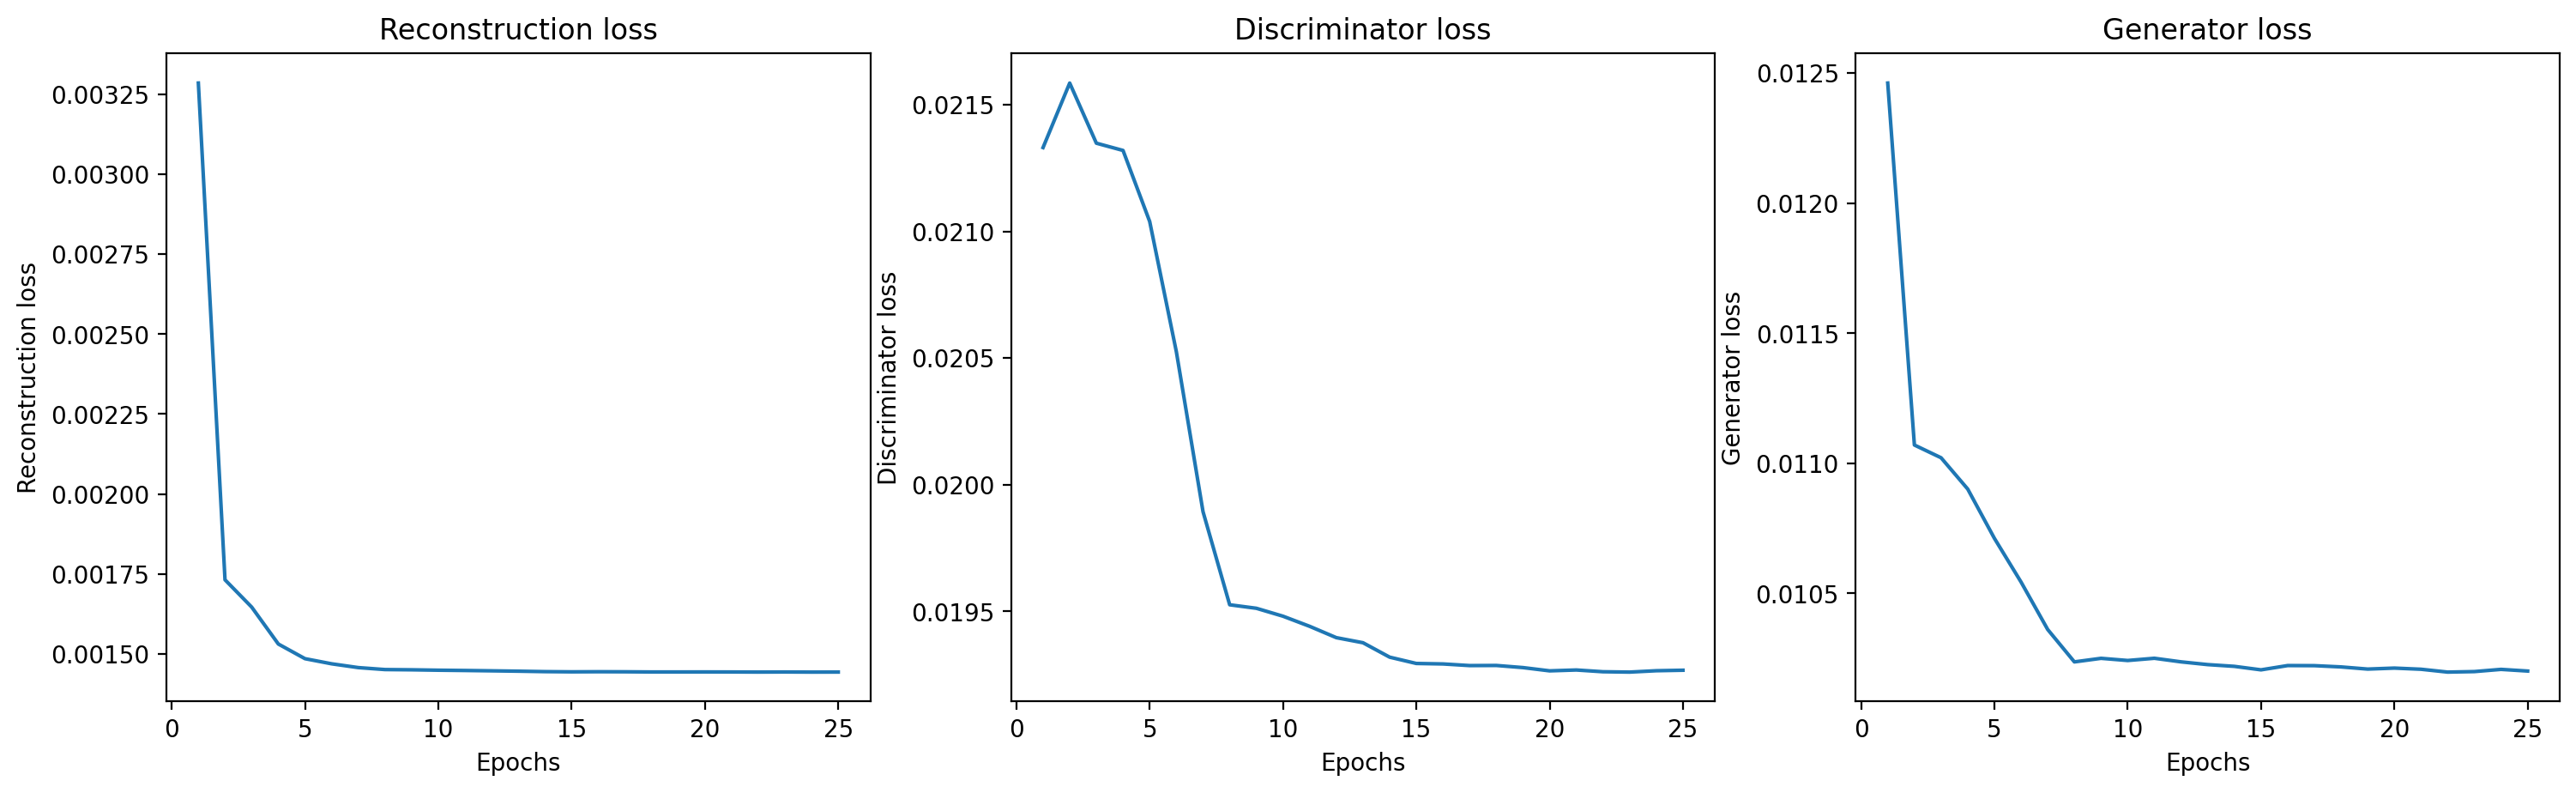

In [ ]:
encoder_scratch, decoder_scratch, discriminator_scratch, history_scratch = load_weights_and_history(save_path_scratch)
metrics(history_scratch)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from scipy.interpolate import interp1d
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# find threshold using mean recon error + lambda * standard dev
def get_mean_std(encoder, decoder, data_loader):
  encoder.eval()
  decoder.eval()
  reconstruction_scores = []
  loss = nn.BCELoss()
  loop = tqdm(data_loader, total=len(data_loader), position=0, leave=True)

  for data, label in loop:
    data = data.to(device)
    encoded = encoder(data)
    decoded = decoder(encoded)
    
    for i in range (data.size(0)):
      anomaly_score = loss(data[i], decoded[i])
      reconstruction_scores.append(anomaly_score.item())

  loss_mean = np.mean(reconstruction_scores)
  loss_std = np.std(reconstruction_scores)

  return loss_mean, loss_std

loss_mean, loss_std = get_mean_std(encoder_scratch, decoder_scratch, train_dataloader)


def stdev_based_metrics(encoder,decoder, dataloader, lambda_, loss_mean, loss_std):
  encoder.eval()
  decoder.eval()
  anomaly_scores = []
  true_labels = []
  loss = nn.BCELoss()
  loop = tqdm(dataloader,total=len(dataloader),position=0,leave=True)
  for data,label in loop:
    data = data.to(device)
    encoded = encoder(data)
    decoded = decoder(encoded)

    for i in range (data.size(0)):
      anomaly_score = loss(data[i], decoded[i])
      anomaly_scores.append(anomaly_score.item())
      true_labels.append(label[i])

  upper_threshold = loss_mean + lambda_ * loss_std
  predictions = [0 if x <= upper_threshold else 1 for x in anomaly_scores]
  print(accuracy_score(true_labels, predictions),precision_score(true_labels, predictions, average = 'weighted'),recall_score(true_labels, predictions, average = 'weighted'),f1_score(true_labels, predictions, average = 'weighted'))
  
print('1 sigma:')
stdev_based_metrics(encoder_scratch, decoder_scratch, test_dataloader, 1, loss_mean, loss_std)

print('2 sigma:')
stdev_based_metrics(encoder_scratch, decoder_scratch, test_dataloader, 2, loss_mean, loss_std)

print('3 sigma:')
stdev_based_metrics(encoder_scratch, decoder_scratch, test_dataloader, 3, loss_mean, loss_std)

100%|██████████| 1883/1883 [01:29<00:00, 21.03it/s]


1 sigma:


100%|██████████| 181/181 [00:08<00:00, 20.71it/s]


0.9733148501126321 0.9742180068674829 0.9733148501126321 0.9733939711377753
2 sigma:


100%|██████████| 181/181 [00:08<00:00, 20.98it/s]


0.853838156298735 0.870738133745922 0.853838156298735 0.8483956317656127
3 sigma:


100%|██████████| 181/181 [00:08<00:00, 20.79it/s]


0.8084387454513949 0.8396317053145427 0.8084387454513949 0.7964187589457683


In [ ]:
def find_thresh(encoder, decoder, val_dataloader, viz=False):
    encoder.eval()
    decoder.eval()

    errors_plot = {0:[], 1:[]}
    anomaly_scores = []
    labels = []

    # mse = nn.MSELoss()
    mse = nn.BCELoss()

    loop = tqdm(val_dataloader, total=len(val_dataloader), position=0, leave=True)
    for data, label in loop:
        data = data.to(device)

        encoded = encoder(data)
        decoded = decoder(encoded)

        for i in range (data.size(0)):
            anomaly_score = mse(data[i], decoded[i])
            anomaly_scores.append(anomaly_score.item())
            labels.append(label[i])

            if viz == True:
                if label[i] == 0:
                    errors_plot[0].append(anomaly_score.item())
                else:
                    errors_plot[1].append(anomaly_score.item())

    precision, recall, thresholds = precision_recall_curve(labels, anomaly_scores)
    precision = precision[1:]
    recall = recall[1:]

    # calculate the intercept between precision and recall to find best trade-off
    # from https://stackoverflow.com/questions/3252194/numpy-and-line-intersections
    thresh = interp1d(precision - recall, thresholds)(0)
    pr_intersect = interp1d(thresholds, precision)(thresh)

    if viz == True:
        # precision recall
        plt.figure(figsize=(5,5), dpi=200)
        plt.plot(thresholds, precision, label='precision')
        plt.plot(thresholds, recall, label='recall')
        plt.scatter(thresh, pr_intersect, marker='*', c='black', label='threshold')
        plt.ylabel('Precision/Recall')
        plt.xlabel('Threshold')
        plt.legend()
        plt.show()

        # anomaly score histogram
        plt.figure(figsize=(5,5), dpi=200)
        plt.hist(errors_plot[0], bins=100, color='b', alpha=.5, label='normal')
        plt.hist(errors_plot[1], bins=100, color='r', alpha=.5, label='attack')
        plt.axvline(thresh, linestyle='--', c='black', label='threshold')
        plt.ylabel('Density')
        plt.xlabel('Anomaly score')
        plt.legend()
        plt.show()

        # ROC
        plt.figure(figsize=(5,5), dpi=200)
        fp, tp, _ = roc_curve(labels, anomaly_scores)
        auroc = auc(fp, tp)

        auroc = float('{:.2f}'.format(auroc))
        n = f'auroc = {auroc}'

        plt.plot(fp, tp, label=n)
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.xlabel('False Positives')
        plt.ylabel('True Positives')
        ax = plt.gca()
        ax.set_aspect('equal')
        plt.legend()
        plt.show()

    return thresh.item()

In [ ]:
def evaluate(encoder, decoder, test_dataloader, thresh):
    """
    Use the AAE for inference over the `test_dataloader` data. A label is assigned 
    depending on whether the anomaly_score, defined as the error between the original
    image and its reconstruction, is above or below `thresh`.

    Inputs:
    -------
    test_dataloader: a `DataLoader` based on MQTT flow dataset

    thresh: a number that defines the label of an input image according to the error
    between the original image and its reconstruction. If error > thresh, label = 1; 
    if error <= thresh, label = 0 (float)
    """
    encoder.eval()
    decoder.eval()

    # mse = nn.MSELoss()
    mse = nn.BCELoss()
    true_labels = []
    predictions = []
        
    loop = tqdm(test_dataloader, total=len(test_dataloader), position=0, leave=True)
    for data, label in loop:
        data = data.to(device)
        label = label.to(device)

        encoded = encoder(data)
        decoded = decoder(encoded)

        for i in range (data.size(0)):
            anomaly_score = mse(data[i], decoded[i])

            pred = int(anomaly_score > thresh)

            true_labels.append(label[i].item())
            predictions.append(pred)

    # plot confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    group_percentages = ['({0:.2%})'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    tn, fp, fn, tp = cm.ravel()

    plt.figure(figsize=(5,5), dpi=200)
    sns.heatmap(cm, annot=labels, fmt="")
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    
    print(accuracy_score(true_labels, predictions),precision_score(true_labels, predictions, average = 'weighted'),recall_score(true_labels, predictions, average = 'weighted'),f1_score(true_labels, predictions, average = 'macro'))
    print(accuracy_score(true_labels, predictions),precision_score(true_labels, predictions, average = 'weighted'),recall_score(true_labels, predictions, average = 'weighted'),f1_score(true_labels, predictions, average = 'weighted'))

100%|██████████| 181/181 [00:09<00:00, 18.95it/s]


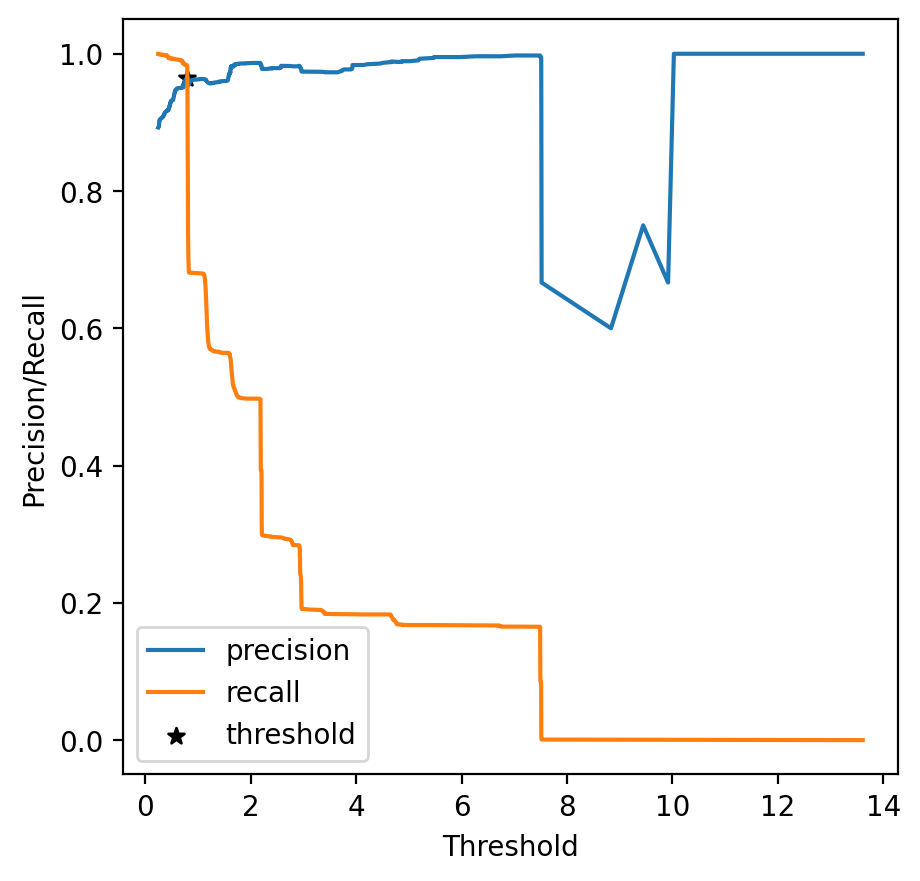

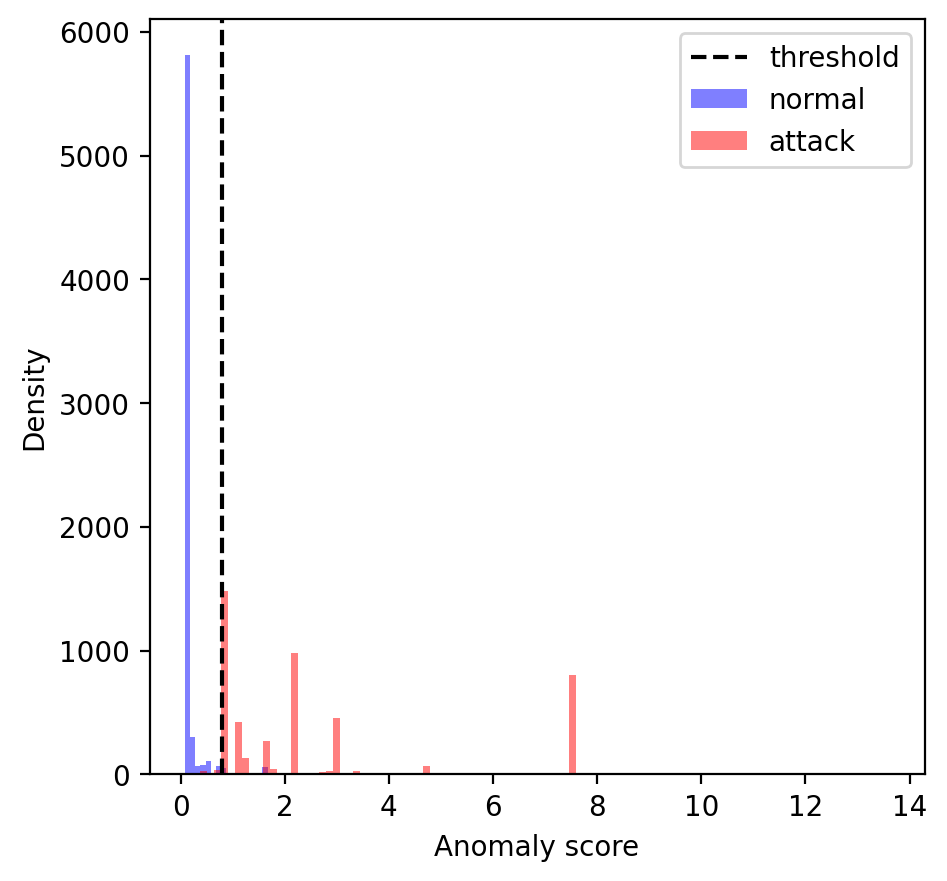

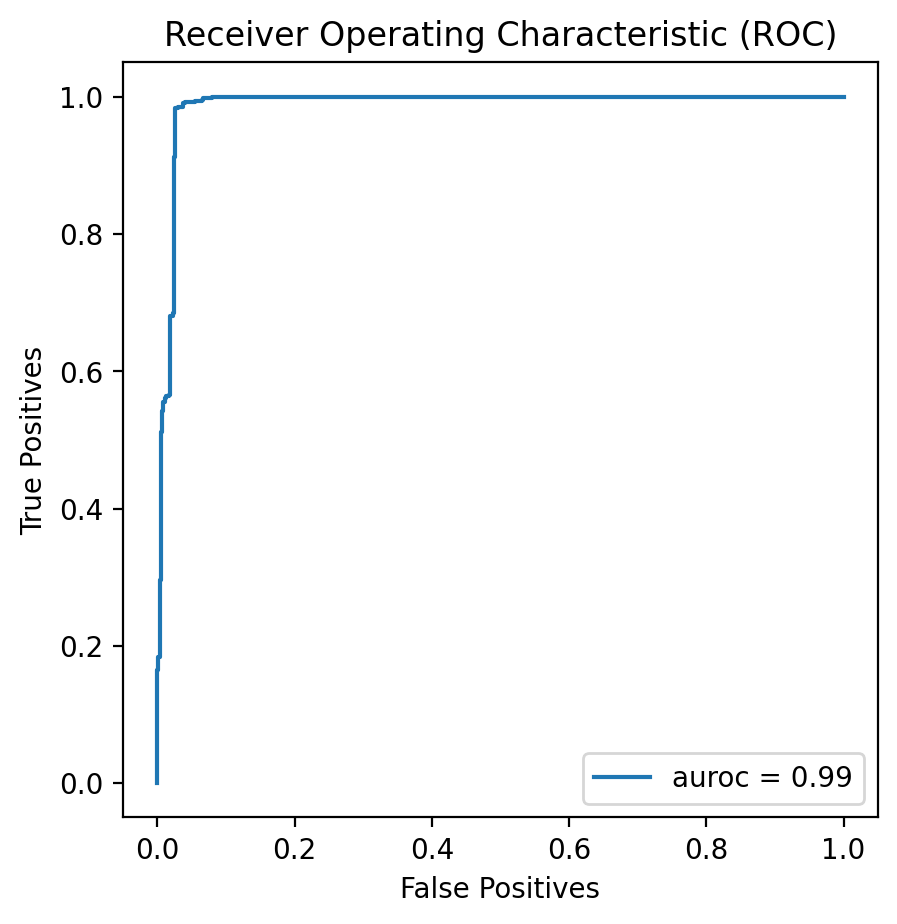

0.7977078557014465

In [ ]:
thresh_scratch = find_thresh(encoder_scratch, decoder_scratch, valid_dataloader, viz=True)
thresh_scratch

100%|██████████| 181/181 [00:09<00:00, 18.52it/s]


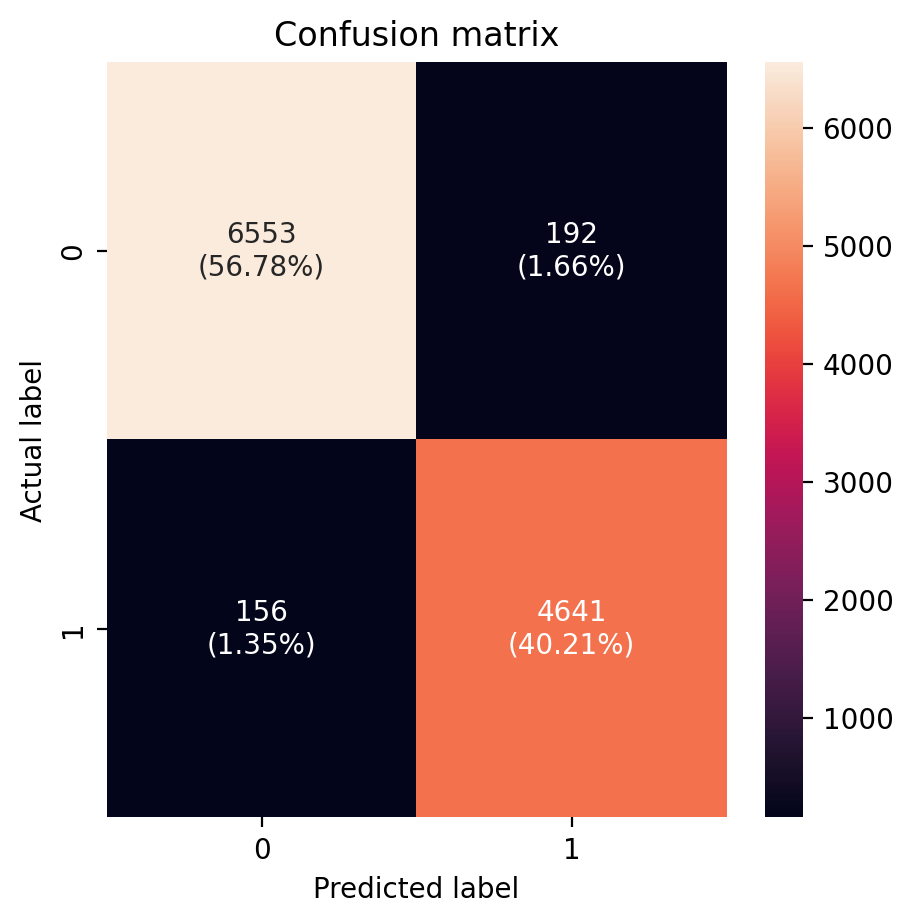

0.9698492462311558 0.9699006310071414 0.9698492462311558 0.9689985074329653
0.9698492462311558 0.9699006310071414 0.9698492462311558 0.9698652643256823


In [ ]:
dec_list = evaluate(encoder_scratch, decoder_scratch, test_dataloader, thresh_scratch)

In [ ]:
## max f1 score based method
def get_f1score(predictions,true_labels, thresh):
  predictions = predictions = [0 if x <= thresh else 1 for x in predictions]
  f1_weighted = f1_score(true_labels, predictions, average = 'weighted')
  f1_macro = f1_score(true_labels, predictions, average = 'macro')
  return f1_weighted,f1_macro

threshold_vals = np.arange(0,1,0.01)
print(threshold_vals.shape)
thresh_weighted = {}; thresh_macro = {}

def get_scores_labels(encoder,decoder, dataloader):
  encoder.eval()
  decoder.eval()
  anomaly_scores = []
  labels = []
  loss = nn.BCELoss()
  loop = tqdm(dataloader,total=len(dataloader),position=0,leave=True)
  for data,label in loop:
    data = data.to(device)
    encoded = encoder(data)
    decoded = decoder(encoded)

    for i in range (data.size(0)):
      anomaly_score = loss(data[i], decoded[i])
      anomaly_scores.append(anomaly_score.item())
      labels.append(label[i])

  return anomaly_scores, labels

predictions_,test_labels = get_scores_labels(encoder_scratch,decoder_scratch,test_dataloader)

for value in threshold_vals:
  print(value)
  thresh_weighted[value],thresh_macro[value] = get_f1score(predictions_,test_labels,value)

best_thresh_weighted = max(thresh_weighted, key=thresh_weighted.get)
best_thresh_macro = max(thresh_macro, key = thresh_macro.get)
print(best_thresh_weighted)

(100,)


100%|██████████| 181/181 [00:08<00:00, 20.48it/s]


0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
0.79


100%|██████████| 181/181 [00:09<00:00, 18.70it/s]


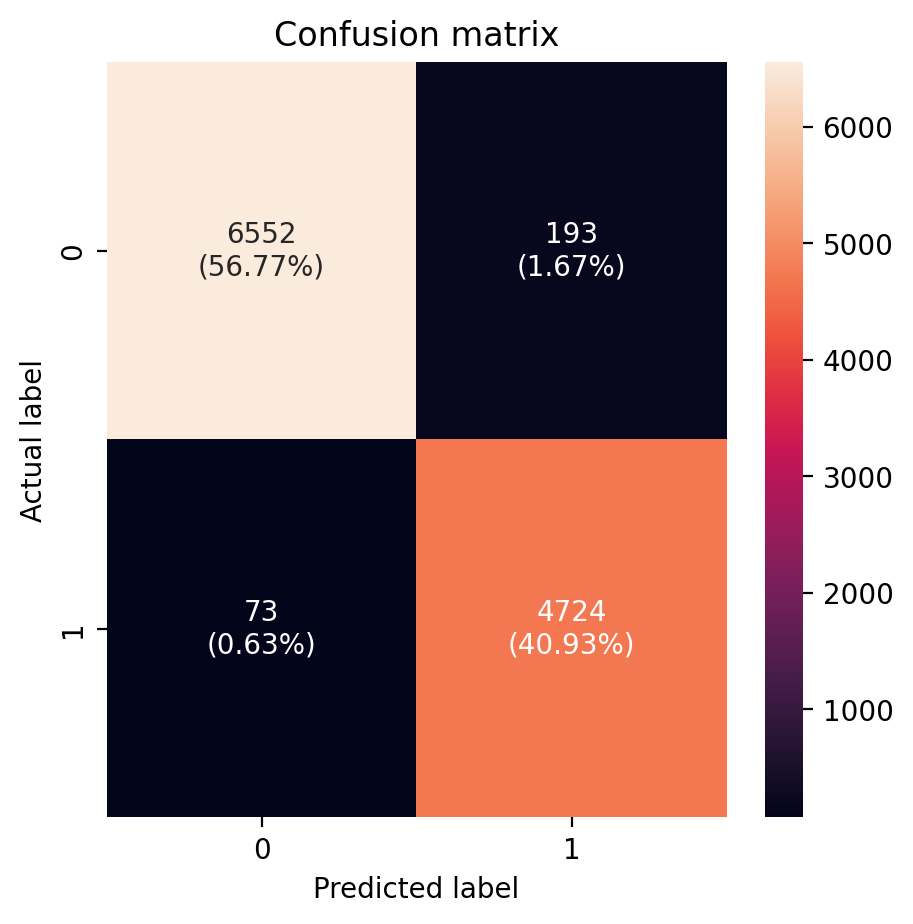

0.9769537341881823 0.9772472643379636 0.9769537341881823 0.9763607768568494
0.9769537341881823 0.9772472643379636 0.9769537341881823 0.97699265917711


In [ ]:
evaluate(encoder_scratch, decoder_scratch, test_dataloader, best_thresh_weighted)

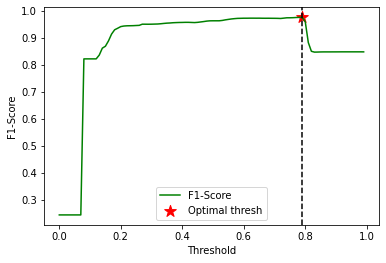

In [ ]:
plt.plot(threshold_vals,list(thresh_weighted.values()), label='F1-Score', c='green')
plt.scatter(best_thresh_weighted, thresh_weighted[best_thresh_weighted], s=150, marker='*', c='red', label='Optimal thresh')
plt.axvline(best_thresh_weighted, linestyle='--', c='black')
plt.ylabel('F1-Score')
plt.xlabel('Threshold')
plt.legend()
plt.show()

In [ ]:
path1 = "/content/drive/MyDrive/MQTT_final/threshold_Exp/"
pickled_list = [[best_thresh_weighted],threshold_vals,list(thresh_weighted.values())]
import pickle
with open(path1+'GAN_AE_custom.pkl', 'wb') as file:
    pickle.dump(pickled_list, file)